In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_normalized = pd.read_csv("normalized_financial_data.csv")
df = pd.read_csv("financial_data.csv")

df_num = df.select_dtypes(include=['number'])

print("==== Dataset Information ====")
print(df.info())

print("\n==== Dataset Shape ====")
print(df.shape)

numerical_summary = df.describe()
print("\n==== Numerical Summary ====")
print(numerical_summary)

# numerical_summary.to_csv("numerical_summary.csv", index=True)
#
# print("Numerical summary has been saved as 'numerical_summary.csv'.")


==== Dataset Information ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Columns: 113 entries, fiscalDateEnding to volatility_6m
dtypes: float64(104), int64(1), object(8)
memory usage: 15.5+ MB
None

==== Dataset Shape ====
(17966, 113)

==== Numerical Summary ====
        totalAssets  totalCurrentAssets  \
count  1.796600e+04        1.796600e+04   
mean   7.702516e+10        1.320511e+10   
std    3.209269e+11        3.829014e+10   
min    0.000000e+00        1.000000e+01   
25%    7.100000e+09        1.594632e+09   
50%    1.877691e+10        3.754000e+09   
75%    4.801322e+10        9.623500e+09   
max    2.691500e+13        7.695960e+11   

       cashAndCashEquivalentsAtCarryingValue  cashAndShortTermInvestments  \
count                           1.796600e+04                 1.796600e+04   
mean                            5.582360e+09                 7.430703e+09   
std                             2.900210e+10                 3.405027e+10   
min  

In [8]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({"Missing Count": missing_values, "Missing Percentage": missing_percentage})
missing_data = missing_data[missing_data["Missing Count"] > 0].sort_values(by="Missing Count", ascending=False)

print("\n==== Missing Value Analysis ====")
print(missing_data)


==== Missing Value Analysis ====
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


In [3]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
#
# # Create folder to save plots
# output_folder = "distributions"
# os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist
#
# # Select numerical columns
# numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
#
# # Generate and save histograms
# for col in numerical_columns:
#     plt.figure(figsize=(10, 6))
#     df[col].dropna().plot(kind='hist', bins=50, edgecolor='k')
#     plt.title(f"Distribution of {col}")
#     plt.xlabel(col)
#     plt.ylabel("Frequency")
#     plt.grid(True)
#
#     # Save the plot as an image
#     file_path = os.path.join(output_folder, f"{col}_distribution.png")
#     plt.savefig(file_path)
#     plt.close()  # Close the plot to free memory
#
#     print(f"Saved: {file_path}")  # Print confirmation for each saved file


Saved: distributions/totalAssets_distribution.png
Saved: distributions/totalCurrentAssets_distribution.png
Saved: distributions/cashAndCashEquivalentsAtCarryingValue_distribution.png
Saved: distributions/cashAndShortTermInvestments_distribution.png
Saved: distributions/inventory_distribution.png
Saved: distributions/currentNetReceivables_distribution.png
Saved: distributions/totalNonCurrentAssets_distribution.png
Saved: distributions/propertyPlantEquipment_distribution.png
Saved: distributions/accumulatedDepreciationAmortizationPPE_distribution.png
Saved: distributions/intangibleAssets_distribution.png
Saved: distributions/intangibleAssetsExcludingGoodwill_distribution.png
Saved: distributions/goodwill_distribution.png
Saved: distributions/investments_distribution.png
Saved: distributions/longTermInvestments_distribution.png
Saved: distributions/shortTermInvestments_distribution.png
Saved: distributions/otherCurrentAssets_distribution.png
Saved: distributions/otherNonCurrentAssets_dist

In [4]:
# CORRELATION ANALYSIS WITHOUT PCA

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Compute correlation matrix
correlation_matrix_before = df[numerical_columns].corr()

# Save correlation matrix as CSV
correlation_matrix_before.to_csv("correlation_matrix_before_pca.csv")

# Plot and save correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_before, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap (Before PCA Whitening)")
plt.savefig("correlation_heatmap_before_pca.png")
plt.close()  # Close the plot to free memory

print("✅ Correlation matrix before PCA saved as 'correlation_matrix_before_pca.csv' and heatmap saved as 'correlation_heatmap_before_pca.png'.")


✅ Correlation matrix before PCA saved as 'correlation_matrix_before_pca.csv' and heatmap saved as 'correlation_heatmap_before_pca.png'.


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_columns])

# Apply PCA Whitening
pca = PCA(whiten=True)
X_pca = pca.fit_transform(X_scaled)

# Convert PCA-transformed data back into a DataFrame
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

In [6]:
# Compute correlation matrix after PCA
correlation_matrix_after = df_pca.corr()

# Save correlation matrix as CSV
correlation_matrix_after.to_csv("correlation_matrix_after_pca.csv")

# Plot and save correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_after, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap (After PCA Whitening)")
plt.savefig("correlation_heatmap_after_pca.png")
plt.close()  # Close the plot to free memory

print("✅ Correlation matrix after PCA saved as 'correlation_matrix_after_pca.csv' and heatmap saved as 'correlation_heatmap_after_pca.png'.")

✅ Correlation matrix after PCA saved as 'correlation_matrix_after_pca.csv' and heatmap saved as 'correlation_heatmap_after_pca.png'.


In [7]:
# Compute mean absolute correlation values
mean_corr_before = correlation_matrix_before.abs().mean().mean()
mean_corr_after = correlation_matrix_after.abs().mean().mean()

print(f"📊 Mean Absolute Correlation Before PCA: {mean_corr_before:.4f}")
print(f"📊 Mean Absolute Correlation After PCA: {mean_corr_after:.4f}")

📊 Mean Absolute Correlation Before PCA: 0.1521
📊 Mean Absolute Correlation After PCA: 0.0095


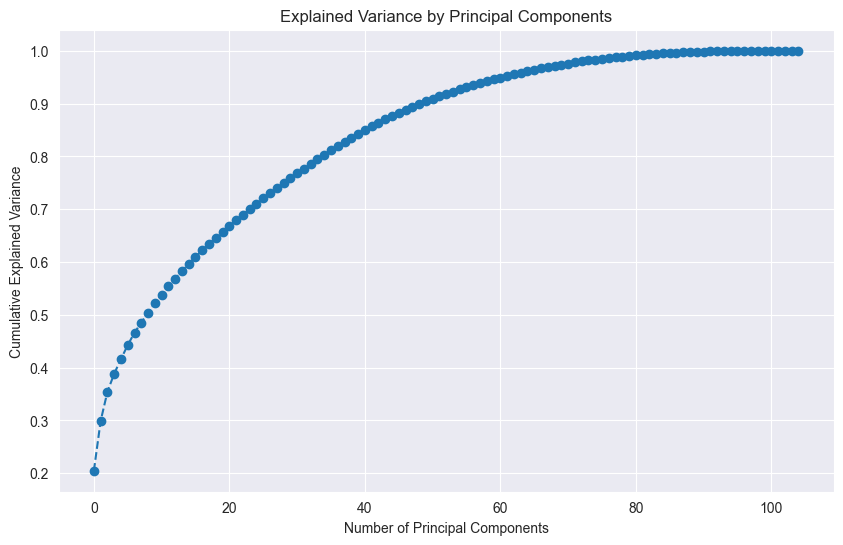

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [9]:
# Apply PCA with the chosen number of components
from sklearn.decomposition import PCA

n_components = 50  # Choose based on explained variance curve
pca = PCA(n_components=n_components, whiten=True)
X_pca_reduced = pca.fit_transform(X_scaled)

# Convert back to DataFrame
df_pca_reduced = pd.DataFrame(X_pca_reduced, columns=[f"PC{i+1}" for i in range(n_components)])

# Save the reduced PCA dataset
df_pca_reduced.to_csv("pca_reduced_data.csv", index=False)
print(f"✅ PCA dataset with {n_components} components saved as 'pca_reduced_data.csv'.")


✅ PCA dataset with 50 components saved as 'pca_reduced_data.csv'.


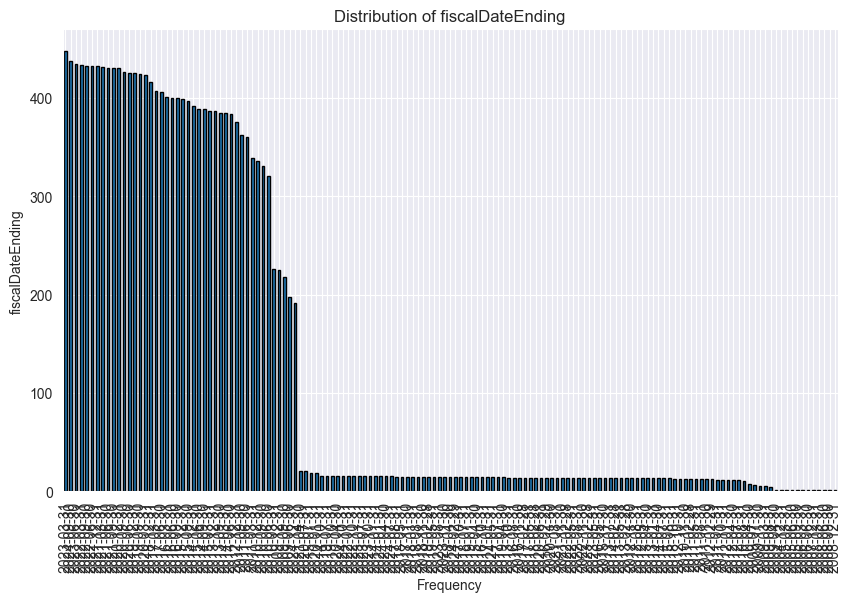

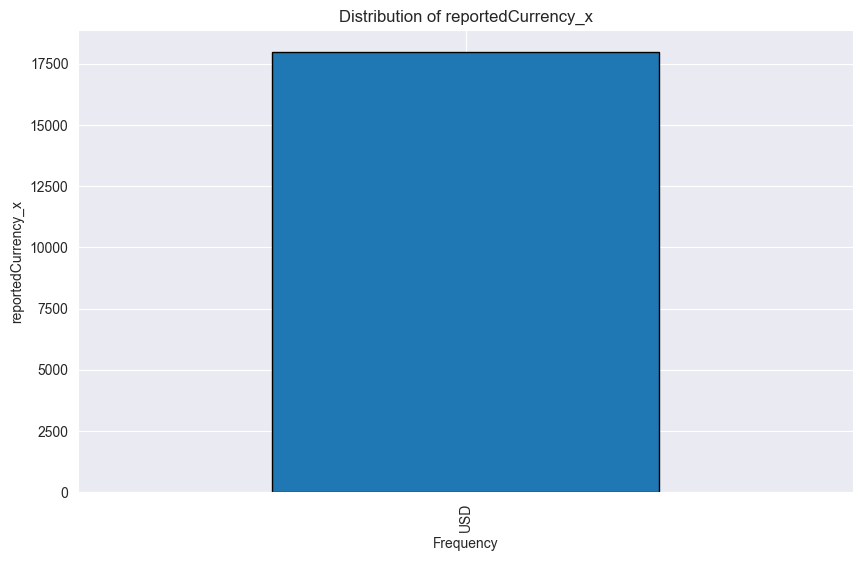

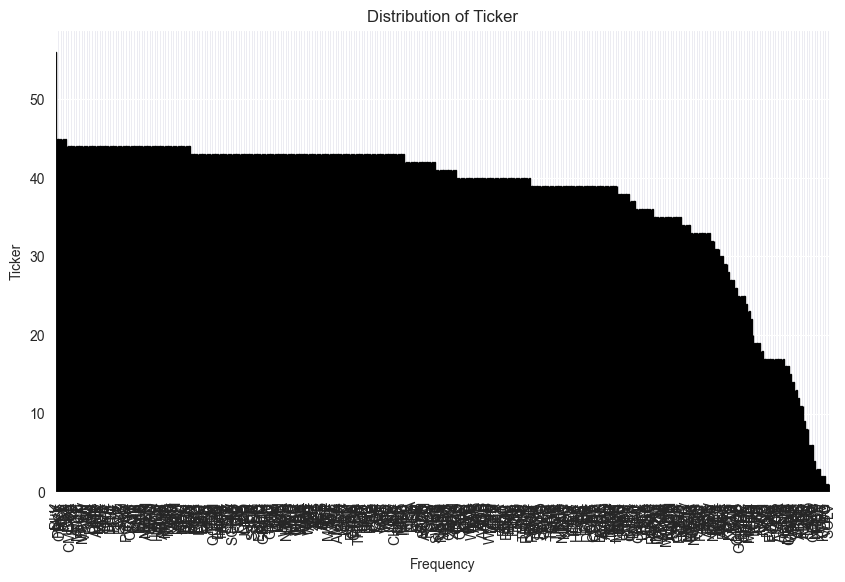

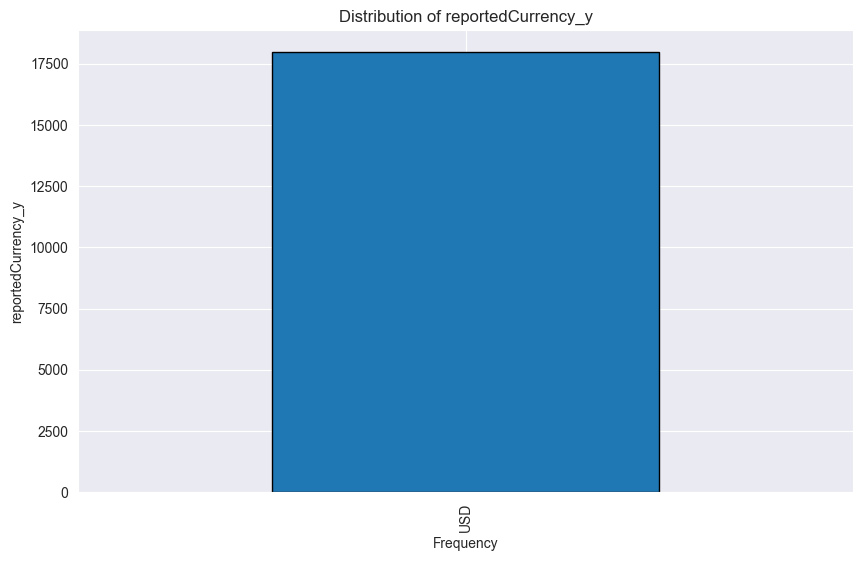

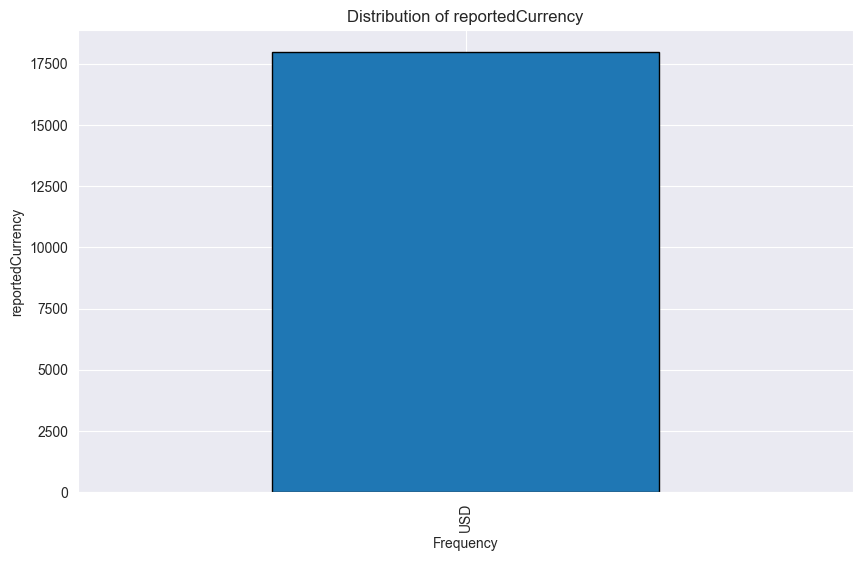

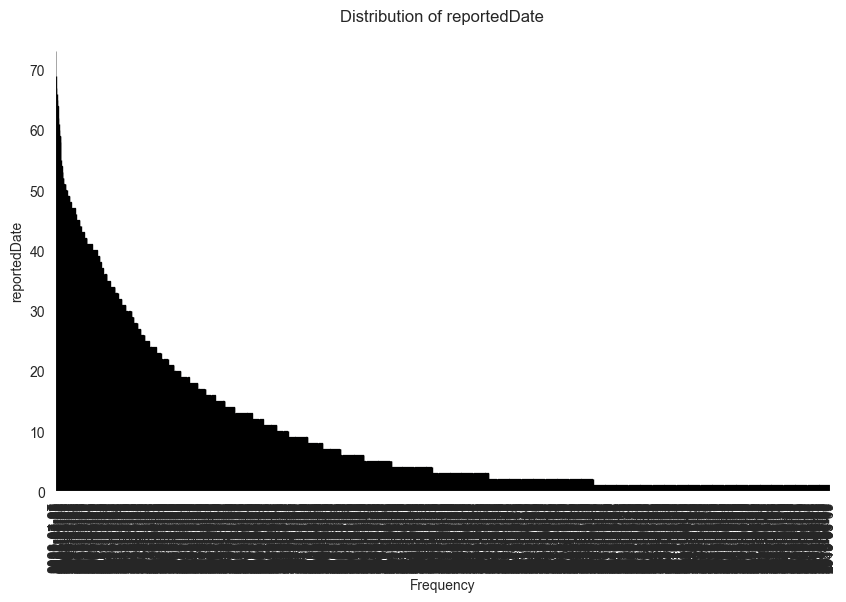

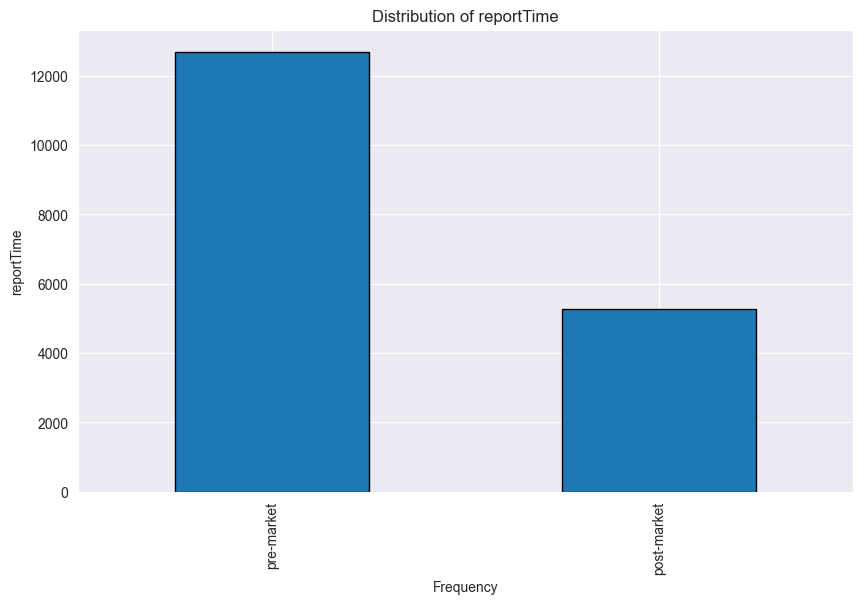

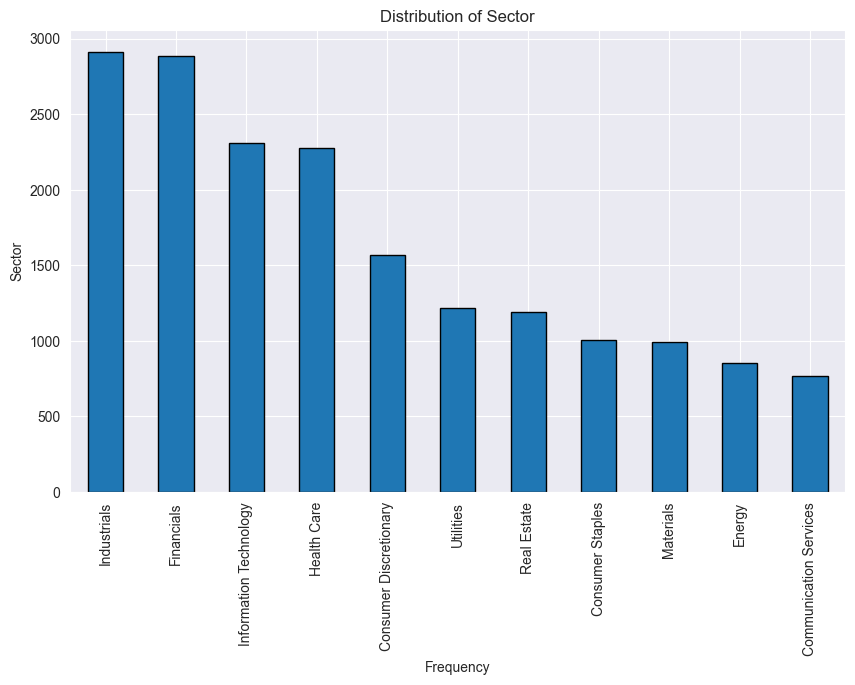

In [3]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar', edgecolor='k')
    plt.title(f"Distribution of {col}")
    plt.xlabel('Frequency')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

/var/folders/vr/_1g56whn5gs0c482hvr88_cm0000gn/T/ipykernel_54270/1757351505.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sector_counts.index, x=sector_counts.values, palette="Blues_r", orient="h")


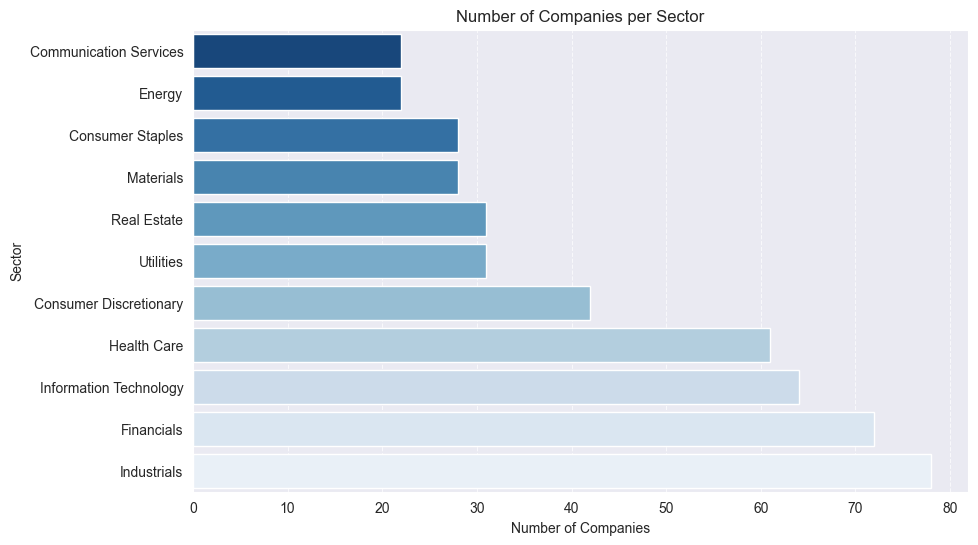

In [6]:

sector_counts = df.groupby("Sector")["Ticker"].nunique().sort_values(ascending=True)

# Plot (Flipped Axis)
plt.figure(figsize=(10, 6))
sns.barplot(y=sector_counts.index, x=sector_counts.values, palette="Blues_r", orient="h")

# Labels & Formatting
plt.ylabel("Sector")
plt.xlabel("Number of Companies")
plt.title("Number of Companies per Sector")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()

==== Target Variable Distribution ====
Close
48.81     0.000390
42.42     0.000390
70.63     0.000390
57.76     0.000390
28.63     0.000390
            ...   
154.04    0.000056
161.58    0.000056
101.78    0.000056
137.06    0.000056
195.38    0.000056
Name: proportion, Length: 11838, dtype: float64


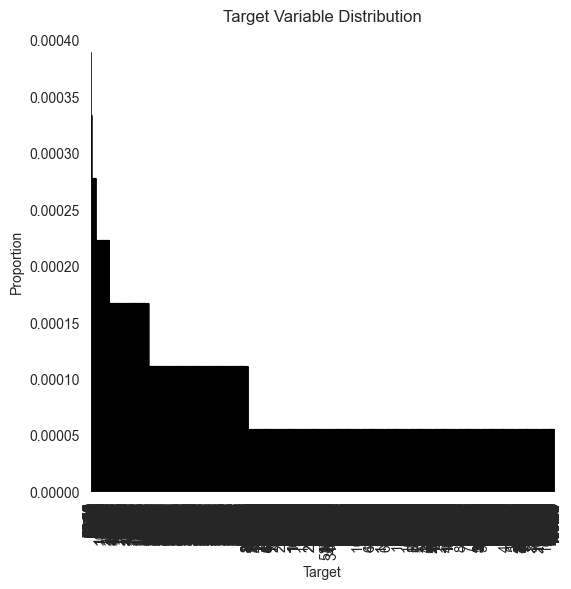

In [9]:
target = 'Close'

if target in df.columns:
    target_distribution = df[target].value_counts(normalize=True)
    print("==== Target Variable Distribution ====")
    print(target_distribution)

    plt.figure(figsize=(6, 6))
    target_distribution.plot(kind='bar', edgecolor='k')
    plt.title("Target Variable Distribution")
    plt.xlabel("Target")
    plt.ylabel("Proportion")
    plt.grid(True)
    plt.show()
else:
    print("No target variable ('Close') in dataset.")

In [10]:
import os

# Create a folder to store box plots
output_folder = "box_plots"
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Loop through numerical columns and save box plots
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.grid(True)

    # Save the plot as an image
    file_path = os.path.join(output_folder, f"{col}_boxplot.png")
    plt.savefig(file_path)
    plt.close()  # Close the plot to free memory

    print(f"✅ Saved: {file_path}")  # Print confirmation for each saved file


✅ Saved: box_plots/totalAssets_boxplot.png
✅ Saved: box_plots/totalCurrentAssets_boxplot.png
✅ Saved: box_plots/cashAndCashEquivalentsAtCarryingValue_boxplot.png
✅ Saved: box_plots/cashAndShortTermInvestments_boxplot.png
✅ Saved: box_plots/inventory_boxplot.png
✅ Saved: box_plots/currentNetReceivables_boxplot.png
✅ Saved: box_plots/totalNonCurrentAssets_boxplot.png
✅ Saved: box_plots/propertyPlantEquipment_boxplot.png
✅ Saved: box_plots/accumulatedDepreciationAmortizationPPE_boxplot.png
✅ Saved: box_plots/intangibleAssets_boxplot.png
✅ Saved: box_plots/intangibleAssetsExcludingGoodwill_boxplot.png
✅ Saved: box_plots/goodwill_boxplot.png
✅ Saved: box_plots/investments_boxplot.png
✅ Saved: box_plots/longTermInvestments_boxplot.png
✅ Saved: box_plots/shortTermInvestments_boxplot.png
✅ Saved: box_plots/otherCurrentAssets_boxplot.png
✅ Saved: box_plots/otherNonCurrentAssets_boxplot.png
✅ Saved: box_plots/totalLiabilities_boxplot.png
✅ Saved: box_plots/totalCurrentLiabilities_boxplot.png
✅ S

In [14]:
# Check if portfolio column exists
print("Columns in DataFrame:", df.columns)

# Check unique values in portfolio column
print("\nUnique values in portfolio column:", df["portfolio"].unique())

# Check if all portfolios exist in every month
portfolio_counts = df.groupby(["fiscalDateEnding", "portfolio"])["monthly_return"].count().unstack()
print("\nPortfolio Counts per Month:")
print(portfolio_counts)


Columns in DataFrame: Index(['fiscalDateEnding', 'reportedCurrency_x', 'totalAssets',
       'totalCurrentAssets', 'cashAndCashEquivalentsAtCarryingValue',
       'cashAndShortTermInvestments', 'inventory', 'currentNetReceivables',
       'totalNonCurrentAssets', 'propertyPlantEquipment',
       ...
       'currentRatio', 'debtToEquity', 'netProfitMargin',
       'operatingCashFlowMargin', 'quickRatio', 'returnOnAssets',
       'returnOnEquity', 'assetTurnover', 'monthly_return', 'volatility_6m'],
      dtype='object', length=113)


KeyError: 'portfolio'

In [11]:
# Ensure ranking works correctly
df["momentum_rank"] = df.groupby("fiscalDateEnding")["momentum_12m"].rank(method="dense", ascending=False)

# Assign portfolios based on ranked values
df["portfolio"] = pd.qcut(df["momentum_rank"], 5, labels=["P1", "P2", "P3", "P4", "P5"], duplicates="drop")


KeyError: 'Column not found: momentum_12m'

In [32]:
# Compute portfolio returns and handle missing groups
portfolio_returns = df.groupby(["fiscalDateEnding", "portfolio"], observed=False)["monthly_return"].mean().unstack()

# Fill missing values with 0 (if necessary)
portfolio_returns = portfolio_returns.fillna(0)

# Ensure spread return calculation doesn't fail
if "P1" in portfolio_returns.columns and "P5" in portfolio_returns.columns:
    portfolio_returns["spread_return"] = portfolio_returns["P5"] - portfolio_returns["P1"]
else:
    print("⚠️ P1 or P5 is missing from portfolio_returns. Spread return cannot be computed correctly.")


In [13]:
import matplotlib.pyplot as plt

if "spread_return" in portfolio_returns.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(portfolio_returns.index, portfolio_returns["spread_return"], label="P5 - P1 Returns", color="blue")
    plt.axhline(y=0, color="red", linestyle="--", label="Zero Line")
    plt.legend()
    plt.title("Momentum Spread Portfolio Returns (P5 - P1)")
    plt.xlabel("Date")
    plt.ylabel("Return Difference")
    plt.grid(True)
    plt.savefig("spread_portfolio_returns_fixed.png")
    plt.show()
else:
    print("⚠️ Spread return is missing. Check portfolio assignments.")

NameError: name 'portfolio_returns' is not defined

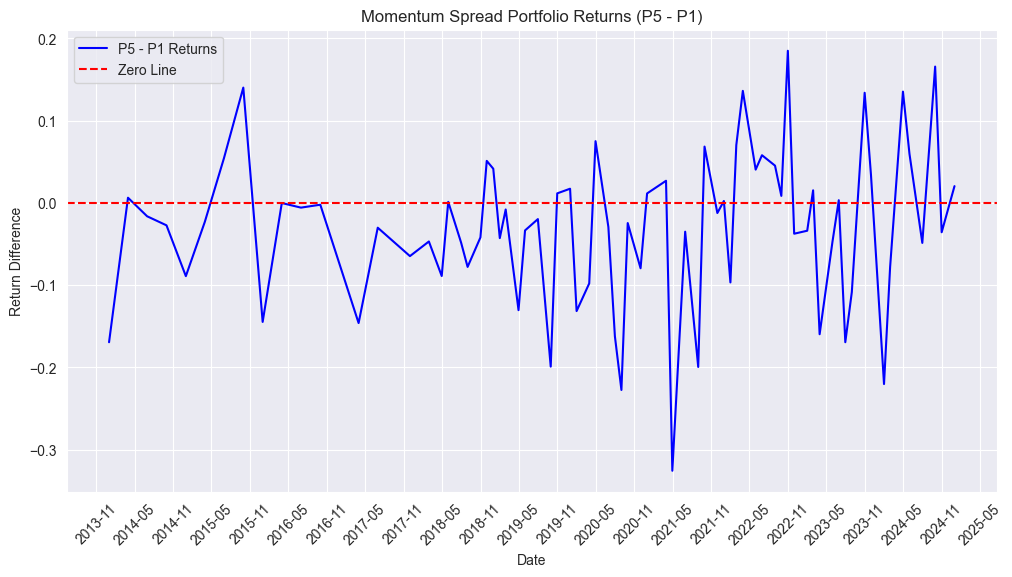

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
df = pd.read_csv("data_with_spread.csv")

# Ensure Date is in datetime format
df["fiscalDateEnding"] = pd.to_datetime(df["fiscalDateEnding"])

# Compute portfolio returns (Grouping by Date and Portfolio)
portfolio_returns = df.groupby("fiscalDateEnding")["spread_return"].mean()

# Plot the Spread Portfolio Returns
if not portfolio_returns.empty:
    plt.figure(figsize=(12, 6))

    # Plot spread portfolio returns
    plt.plot(portfolio_returns.index, portfolio_returns, label="P5 - P1 Returns", color="blue")
    plt.axhline(y=0, color="red", linestyle="--", label="Zero Line")

    # Format x-axis to reduce overcrowding
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show every 6 months
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Format as YYYY-MM
    plt.xticks(rotation=45)  # Rotate labels for readability

    # Labels, legend, and title
    plt.legend()
    plt.title("Momentum Spread Portfolio Returns (P5 - P1)")
    plt.xlabel("Date")
    plt.ylabel("Return Difference")
    plt.grid(True)

    # Save and show
    plt.savefig("spread_portfolio_returns_fixed.png")
    plt.show()
else:
    print("⚠️ Spread return data is empty. Check the dataset.")


In [12]:
# Ensure both datasets use datetime for merging
df["fiscalDateEnding"] = pd.to_datetime(df["fiscalDateEnding"])
portfolio_returns.index = pd.to_datetime(portfolio_returns.index)

# Merge spread return as a new feature
df = df.merge(portfolio_returns[["spread_return"]], on="fiscalDateEnding", how="left")

# Fill any missing values in spread return (if any months were missing)
df["spread_return"] = df["spread_return"].fillna(0)

# Check if merged correctly
print(df[["fiscalDateEnding", "spread_return"]].head())

df.to_csv("data_with_spread.csv", index=False)

print("✅ Dataset with spread return saved as 'data_with_spread.csv'.")

NameError: name 'portfolio_returns' is not defined

In [20]:
print(df1.columns.tolist())

['fiscalDateEnding', 'reportedCurrency_x', 'totalAssets', 'totalCurrentAssets', 'cashAndCashEquivalentsAtCarryingValue', 'cashAndShortTermInvestments', 'inventory', 'currentNetReceivables', 'totalNonCurrentAssets', 'propertyPlantEquipment', 'accumulatedDepreciationAmortizationPPE', 'intangibleAssets', 'intangibleAssetsExcludingGoodwill', 'goodwill', 'investments', 'longTermInvestments', 'shortTermInvestments', 'otherCurrentAssets', 'otherNonCurrentAssets', 'totalLiabilities', 'totalCurrentLiabilities', 'currentAccountsPayable', 'deferredRevenue', 'currentDebt', 'shortTermDebt', 'totalNonCurrentLiabilities', 'capitalLeaseObligations', 'longTermDebt', 'currentLongTermDebt', 'longTermDebtNoncurrent', 'shortLongTermDebtTotal', 'otherCurrentLiabilities', 'otherNonCurrentLiabilities', 'totalShareholderEquity', 'treasuryStock', 'retainedEarnings', 'commonStock', 'commonStockSharesOutstanding', 'Ticker', 'reportedCurrency_y', 'operatingCashflow', 'paymentsForOperatingActivities', 'proceedsFrom